# 第五章 机器人运动

## 1. 本章所有机器人模型都是运动学的（kinematic），现考虑动力学（dynamic）。假设一维坐标系中的机器人，$x$ 表示位置，$\dot{x}$ 表示速度，$\ddot{x}$ 表示加速度，假设加速度是给定加速度与高斯噪声$N(0,\sigma^2)$ 之和，并且在$\Delta t$ 时间内保持恒定。请问经过$\Delta t$ 时间后的 $x'$ 与 $\dot{x}'$ 相关吗？为什么？

首先给出机器人的状态转移方程
$$
\begin{align}
\begin{bmatrix} x' \\ \dot{x}'\end{bmatrix} &=
\begin{bmatrix} x + \dot{x} \Delta t + \frac{1}{2} \ddot{x} \Delta t^2 \\ \dot{x} + \ddot{x} \Delta t\end{bmatrix} 
\end{align}
$$

可以发现$x'=x + \dot{x}' \Delta t - \frac{1}{2} \ddot{x} \Delta t^2$，即已知$\dot{x}'$可以唯一确定 $x'$，所以$x'$和$\dot{x}'$两者相关，且为强相关。

## 2. 为题目5.1中的后验分布提供数学公式，并指出值得注意的部分

根据习题5.1中的运动方程
$$
\begin{align}
\begin{bmatrix} x' \\ \dot{x}'\end{bmatrix} &=
\begin{bmatrix} x + \dot{x} \Delta t + \frac{1}{2} \ddot{x} \Delta t^2 \\ \dot{x} + \ddot{x} \Delta t\end{bmatrix} \\
&=\begin{bmatrix} x + \dot{x} \Delta t + \frac{1}{2} \hat{\ddot{x}} \Delta t^2 \\ \dot{x} + \hat{\ddot{x}} \Delta t\end{bmatrix}  
+ \begin{bmatrix} \frac{1}{2} \epsilon \Delta t^2 \\ \epsilon \Delta t \end{bmatrix} \\
&=\begin{bmatrix} 1 &\Delta t \\ 0 &1 \end{bmatrix} \begin{bmatrix} x \\ \dot{x}\end{bmatrix} + \begin{bmatrix} \frac{1}{2} (\Delta t)^2 \\ \Delta t \end{bmatrix} \hat{\ddot{x}} + \begin{bmatrix} \frac{1}{2} (\Delta t)^2 \\ \Delta t \end{bmatrix} \epsilon
\end{align}
$$

其中$\epsilon \sim N(0, \sigma^2)$ 服从高斯分布，令$A= \begin{bmatrix} 1 &\Delta t \\ 0 &1 \end{bmatrix}$, $ B = \begin{bmatrix} \frac{1}{2} (\Delta t)^2 \\ \Delta t \end{bmatrix} $, $ R = B\sigma^2 B^T$，可以得到后验分布的公式如下

$$
\begin{align}
p(X'|X,U) &= p(\begin{bmatrix} x' \\ \ddot{x}'\end{bmatrix} | \begin{bmatrix} x \\ \ddot{x}\end{bmatrix}, \ddot{x}) \\
&\sim N(\begin{bmatrix} x' \\ \ddot{x}'\end{bmatrix} - A\begin{bmatrix} x \\ \ddot{x}\end{bmatrix} - B \ddot{x}, R)
\end{align}
$$

## 3. 假设控制机器人在$T$ 时间间隔具有随机加速度，最终$x$ 和$\dot{x}$ 是相关的吗？随着$T \to \infty$ 依然是相关的吗？是确定的函数吗？

为判断$x$和$\dot{x}$的相关性，首先需要推导$X$的协方差矩阵，根据卡尔曼滤波公式我们可以知道
$$
\begin{align}
\Sigma_{n+1} &= A\Sigma_n A^T + R_0 \\
\Sigma_0 &= \begin{bmatrix} 0 &0 \\0 &0 \end{bmatrix}
\end{align}
$$
为方便计算，可以向量化
$$
\begin{bmatrix} \sigma_{X,n+1}^2 \\ \sigma_{XY,n+1} \\ \sigma_{XY,n+1} \\ \sigma_{Y,n+1}^2 \end{bmatrix} = 
\begin{bmatrix} 1 &\Delta t & \Delta t & (\Delta t)^2 \\ 0 &1 &0 &\Delta t \\ 0 &0 &1 &\Delta t \\ 0 &0 &0 &1 \end{bmatrix}
\begin{bmatrix} \sigma_{X,n}^2 \\ \sigma_{XY,n}^2 \\ \sigma_{XY,n}^2 \\ \sigma_{Y,n}^2 \end{bmatrix}
+ \sigma^2 \begin{bmatrix} \frac{1}{4}(\Delta t)^4 \\ \frac{1}{2}(\Delta t)^3 \\ \frac{1}{2}(\Delta t)^3 \\ (\Delta t)^2 \end{bmatrix}
$$

于是可得
$$
vec(\Sigma_{n+1}) = (A\otimes A)^n vec(\Sigma_0) + (\sum_{i=0}^{n-1}(A \otimes A)^i) vec(R) \\
$$
其中$(A\otimes A)$代表矩阵的[克罗内克积](https://baike.baidu.com/item/克罗内克积/6282573)，他的幂次满足
$$
(A\otimes A)^n = \begin{bmatrix} 1 &n \Delta t & n \Delta t & n^2 (\Delta t)^2 \\ 0 &1 &0 &n \Delta t \\ 0 &0 &1 &n \Delta t \\ 0 &0 &0 &1 \end{bmatrix}
$$

可以得到协方差矩阵各项的值
$$
\begin{align}
\sigma_{X,n}^2 &= \sigma^2 \sum_{i=0}^{n-1}(\frac{1}{4}(\Delta t)^4 + n(\Delta t)^4 + n^2(\Delta t)^4)\\
\sigma_{XY,n} &= \sigma^2 \sum_{i=0}^{n-1}(\frac{1}{2}(\Delta t)^3 + n(\Delta t)^3) \\
\sigma_{Y,n}^2 &=  \sigma^2 \sum_{i=0}^{n-1}((\Delta t)^2)
\end{align}
$$

当$T\to \infty$时
$$
\begin{align}
\lim_{n \to \infty}{\sigma_{X,n}^2} &= \frac{n(n-1)(2n-1)}{6}\sigma^2 (\Delta t)^4 =  \frac{n^3}{3}\sigma^2 (\Delta t)^4\\
\lim_{n \to \infty}\sigma_{XY,n} &= \frac{n(n-1)}{2}\sigma^2 (\Delta t)^3 = \frac{n^2}{2}\sigma^2 (\Delta t)^3\\
\lim_{n \to \infty}\sigma_{Y,n}^2 &=  n \sigma^2 (\Delta t)^2
\end{align}
$$

相关系数为
$$
\rho = \frac{\sigma_{XY,n}}{\sqrt{\sigma_{X,n}^2 \sigma_{X,n}^2}} = \frac{1/2}{\sqrt{1/3 1}}= \frac{\sqrt{3}}{2}
$$
显然相关系数小于1， 所以当$T\to \infty$时，$x$和$\dot{x}$不再相关

## 4. 考虑简单理想自行车模型，轮胎直径为$d$，安装在长度为$l$ 的框架上，前轮绕竖直轴线转动，转角为$\alpha$，后轮与车框架保持平行不能转动。 自行车位姿使用三个变量定义：前轮中心位置$x,y$，自行车框架的角度$\theta$，控制是速度$v$和前轮转角$\alpha$，并在每一个预测周期内恒定。假定$v$和$\alpha$ 受高斯噪声影响，请给出$\Delta t$ 时间间隔的预测模型。

如下图所示，自行车框架角度为$\theta$，车头与自行车框架为$\alpha$，自行车框架速度沿自行车方向，大小为$v$，而自行车车头速度沿车头方向，由于自行车为刚体，所以车头速度在自行车框架方向上的投影为$v$，从而可以求出自行车车头速度为$\frac{v}{\cos\alpha}$

自行车的瞬时旋转的中心是车体垂线和车头垂线的交点，可以求出自行车旋转半径为$\frac{v \Delta t}{l}$
![自行车模型](Ex5_4.png)

设当前系统状态为$X_t=\begin{bmatrix}x_t \\y_t \\ \theta_t \end{bmatrix}$，控制$U_t = \begin{bmatrix}v \\ \alpha \end{bmatrix}$，那么下一时刻系统的状态$X_{t+1}$为
$$
\begin{bmatrix}x_{t+1} \\y_{t+1} \\ \theta_{t+1} \end{bmatrix} = 
\begin{bmatrix}
x_t + v \Delta t \cos \theta_t - v \Delta t \tan \alpha \sin \theta_t \\ 
y_t + v \Delta t \sin \theta_t + v \Delta t \tan \alpha \cos \theta_t \\ 
\theta_t + \frac{v \Delta t}{l} \tan \alpha \end{bmatrix}
$$

## 5. 考虑5.4中的运动学模型，在同样噪声假设下实现自行车后验位姿的采样函数。假设$l=100cm$，$d=80cm$，$\Delta t=1s$，$|\alpha|\leq 80°$，$v \in [0;100]cm/s$。转向角方差$\sigma_{\alpha}^2=25°^2$，速度方差$\sigma_v^2=(50cm^2/s^2)v^2$，注意速度方差与速度相关。请画出多组控制参数产生的采样集。

| 问题编号 |  $\alpha$   |    $v$   |
|---------|-------------|----------|
|     1   |     $25°$   |  $20cm/s$|
|     2   |    $-25°$   |  $20cm/s$|
|     3   |     $25°$   |  $90cm/s$|
|     4   |     $80°$   |  $10cm/s$|
|     5   |     $80°$   |  $90cm/s$|

首先实现5.4中的机器人模型

In [37]:
import numpy as np

def bicycle_model(X_t, U_t):
    l = 1.0
    d = 0.8
    n = U_t.shape[1]
    X_t_1 = np.zeros((3,n))
    for i in range(n):
        X_t_1[0,i] = X_t[0,0] + U_t[1,i]*np.math.cos(X_t[2,0]) - U_t[1,i]*np.math.tan(U_t[0,i])*np.math.sin(X_t[2,0])
        X_t_1[1,i] = X_t[1,0] + U_t[1,i]*np.math.sin(X_t[2,0]) + U_t[1,i]*np.math.tan(U_t[0,i])*np.math.cos(X_t[2,0])
        X_t_1[2,i] = X_t[2,0] + U_t[1,i]/l * np.math.tan(U_t[0,i])
    return X_t_1
    
X_t = np.zeros((3,1))
U_t = np.zeros((2,1))
bicycle_model(X_t, U_t)

array([[0.],
       [0.],
       [0.]])

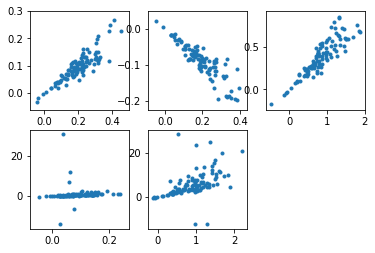

In [49]:
import matplotlib.pyplot as plt

Us = np.mat([[25,-25,25,80,80],[0.2,0.2,0.9,0.1,0.9]])
Us[0,:] = Us[0,:]*np.math.pi/180.0
sigma = np.mat([[25*np.math.pow(np.math.pi/180.0,2),0],[0,0.25]])
sample_num = 100
X_t = np.mat([[0],[0],[0]])

fig = plt.figure()
for i in range(Us.shape[1]):
    ax = fig.add_subplot(2,3,i+1)
    U_t = Us[:,i]
    U_mean = np.array([U_t[0,0], U_t[1,0]])
    sigma_t = np.matmul(np.diag([1,np.math.pow(U_t[1,0],2)]),sigma)
    U_ts = np.random.multivariate_normal(mean=U_mean, cov=sigma_t, size=sample_num)
    X_t_1s = bicycle_model(X_t, U_ts.T)
    ax.scatter(X_t_1s[0,:], X_t_1s[1,:], marker='.')  

plt.show()

## 6. 考虑5.4中运动模型，给定初始状态$x$、$y$、$\theta$和最终$x'$、$y'$（没有$\theta'$），计算最可能的$\alpha$，$v$、$\theta'$，给出数学公式。

需要求解5.4中运动模型的逆运动学

## 7. 假定机器人的驱动器是完整的，具有与姿态为数相同的自由度，能够控制前向速度，正交侧向速度，以及旋转角速度，请给出：
- 机器人的数学模型（控制量受独立高斯噪声影响）
- 计算$p(x_t|u_t, x_{t-1})$
- 给出采样$x\sim p(x_t|u_t, x_{t-1})$的过程

## 8. 证明式（5.12）的三角分布均值为$0$，方差为$b^2$

根据式（5.12）三角分布的概率密度函数为
$$
p_{tri}(x) = max\{0, \frac{1}{\sqrt{6}b} - \frac{|x|}{6b^2}\}
$$
可以发现，概率密度函数为分段函数，取值范围在$x \in [-\sqrt{6}b, \sqrt{6}b]$

根据均值和方差的定义，可得
$$
\begin{align}
\mu_{tri} &= \int_{-\infty}^{+\infty} p_{tri}(x) x dx \\
&= \int_{-\sqrt{6}b}^{+\sqrt{6}b} p_{tri}(x) x dx \\
&= \int_{-\sqrt{6}b}^{0} (\frac{1}{\sqrt{6}b} +\frac{x}{6b^2}) x dx + \int_{0}^{+\sqrt{6}b} (\frac{1}{\sqrt{6}b} - \frac{x}{6b^2}) x dx \\ 
&= \int_{-\sqrt{6}b}^{+\sqrt{6}b} \frac{1}{\sqrt{6}b} xdx + \int_{-\sqrt{6}b}^{0} \frac{x^2}{6b^2} dx - \int_{0}^{+\sqrt{6}b}\frac{x^2}{6b^2} dx \\
&=\frac{1}{\sqrt{6}b} \frac{1}{2} x^2 |_{-\sqrt{6}b}^{\sqrt{6}b} + \frac{1}{6b^2} \frac{1}{3} x^3 |_{-\sqrt{6}b}^{0} - \frac{1}{6b^2} \frac{1}{3} x^3 |_{0}^{\sqrt{6}b} \\
&=0 + \frac{\sqrt{6}}{3}b - \frac{\sqrt{6}}{3}b \\
&=0
\end{align}
$$

$$
\begin{align}
\sigma_{tri} &= \int_{-\infty}^{+\infty}p_{tri}(x) (x - \mu_{tri})^2 dx \\
&= \int_{-\sqrt{6}b}^{+\sqrt{6}b}p_{tri}(x) x^2 dx \\
&= \int_{-\sqrt{6}b}^{0} (\frac{1}{\sqrt{6}b} +\frac{x}{6b^2}) x^2 dx + \int_{0}^{+\sqrt{6}b} (\frac{1}{\sqrt{6}b} - \frac{x}{6b^2}) x^2 dx \\ 
&= \int_{-\sqrt{6}b}^{+\sqrt{6}b} \frac{1}{\sqrt{6}b} x^2dx + \int_{-\sqrt{6}b}^{0} \frac{x^3}{6b^2} dx - \int_{0}^{+\sqrt{6}b}\frac{x^3}{6b^2} dx \\
&=\frac{1}{\sqrt{6}b} \frac{1}{3} x^3 |_{-\sqrt{6}b}^{\sqrt{6}b} + \frac{1}{6b^2} \frac{1}{4} x^4 |_{-\sqrt{6}b}^{0} - \frac{1}{6b^2} \frac{1}{4} x^4 |_{0}^{\sqrt{6}b} \\
&= 4b^2 -\frac{3}{2}b^2 -\frac{3}{2}b^2 \\
&= b^2
\end{align}
$$